<a href="https://colab.research.google.com/github/bluefrappucino/IRISProject/blob/main/Finance_News_Analysis_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [47]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/content/data.csv', encoding='latin-1', names=['Sentiment', 'Text'])

# Display the DataFrame
df.head()

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


### Data Cleaning

In [50]:
import re
def remove_html_tags(text):
    clean_text = re.compile('<.*?>')
    return re.sub(clean_text,'',text)

In [51]:
df['Text'] = df['Text'].apply(remove_html_tags)
df.sample(4)

,Sentiment,Text
826,positive,BasWare 's CEO Ilkka Sihvo comments in conjunc...
2532,neutral,"Only L+Ænnen Tehtaat showed a loss , but it ha..."
653,positive,Finnish fibers and plastic products maker Suom...
1196,neutral,Chief Financial Officer Jim Heindlmeyer said B...


In [52]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stopwords_set = set(stopwords.words('english'))
ps = PorterStemmer()

def clean(text):
    words = word_tokenize(text)
    transformed_text = []
    for w in words:
        if w.isalnum():
            transformed_text.append(w.lower())

    cleaned_text = []
    for w in transformed_text:
        stemmed_word = ps.stem(w)
        if stemmed_word not in stopwords_set:
            cleaned_text.append(stemmed_word)

    return ' '.join(cleaned_text)

In [54]:
clean('Kohli was dancing this morning at the stage')

'kohli wa danc thi morn stage'

In [55]:
df['Text'] = df['Text'].apply(clean)
df.sample(4)

,Sentiment,Text
2985,neutral,report result august 22
1665,neutral,uranium found local natur occur make sens extr...
3687,neutral,mcdonald start even hi set featur hit hi solo ...
4794,neutral,hull vessel wa built one block time ruukki del...


WordCloud

In [56]:
!pip install wordcloud

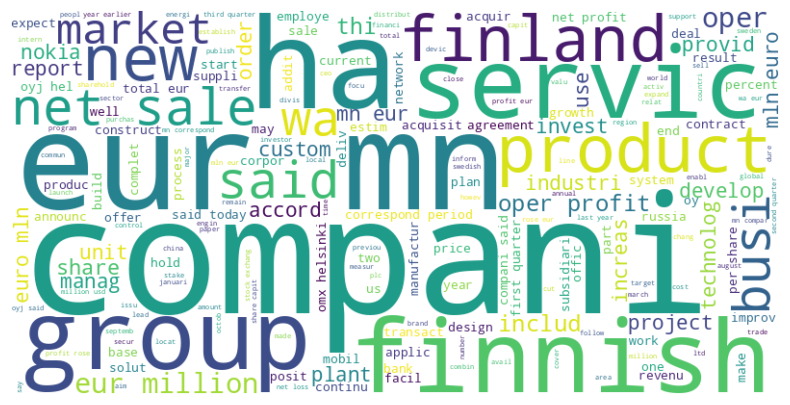

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df['Text'] = df['Text'].astype(str)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### CountVectorizer and LabelEncoder

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [59]:
##label encoder to transform target column
le = LabelEncoder()
trf  = le.fit_transform(df['Sentiment'])
trf = pd.DataFrame(trf)
df['Sentiment'] = trf
df.sample(4)

,Sentiment,Text
3904,1,solut demonstr tablet develop aava mobil syste...
4657,0,finnish scanfil contract manufactur system sup...
396,1,efor ceo reijo maihaniemi said compani ha deve...
3094,1,proha plc euronext announc today 19 may subsid...


In [60]:
cv = CountVectorizer(max_features=5000)

In [61]:
df['Text'] = df['Text'].astype(str)
vectors = cv.fit_transform(df['Text'])
vectors.shape

(4846, 5000)

In [62]:
vectors = cv.fit_transform(df['Text'])
vectors.shape

(4846, 5000)

### Train Test Splitting

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
vectors = vectors.toarray()

In [65]:
X = vectors
y = df['Sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(3876, 5000)

# Model Traning (Naive Bayes)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
model = [gnb,mnb,bnb]

In [69]:
for m in model:
    m.fit(X_train,y_train)
    y_preds = m.predict(X_test)
    print(f'{m} Accuracy score is :',accuracy_score(y_test,y_preds))

GaussianNB() Accuracy score is : 0.511340206185567
MultinomialNB() Accuracy score is : 0.6927835051546392
BernoulliNB() Accuracy score is : 0.7010309278350515
